# NumPy and SciPy 

## Using NumPy to Look at Series of Data

In [1]:
# set these as constants
p = 1000
y = 1
c = 100

In [2]:
import benpy

In [3]:
# %load benpy.py
def compound_calculator(principal,rate,year,contribution):
    '''
    compound_calculator(p,r,y,c) calculates the value at year y of an investment
    p = principal
    r = interest rate (percent value)
    y = year
    c = contribution at end of each year
    '''

    p = principal
    r = rate/100
    y = year
    c = contribution
    balance = p*(1 + r)**y + c*( ((1 + r)**(y+1) - (1 + r)) / r )
    return balance

In [4]:
rates = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Calculate the balance for each of the given rates 

In [5]:
balance = []
for i in rates:
    r = i
    balance.append(benpy.compound_calculator(p,r,y,c))
print(balance)

[1111.0, 1121.9999999999998, 1132.9999999999998, 1144.0000000000002, 1155.0, 1166.0000000000002, 1177.0, 1188.0, 1199.0, 1210.0]


This is what we might like to do:
`balance = benpy.compound_calculator(p,rates,y,c)
* Has the list of rates directly in the function call

In [6]:
import numpy as np

In [7]:
ratesnp = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [8]:
ratesnp

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
balancenp = benpy.compound_calculator(p,ratesnp,y,c)

In [10]:
balancenp

array([1111., 1122., 1133., 1144., 1155., 1166., 1177., 1188., 1199.,
       1210.])

### We're going to use a bit of ipython "magics" to look at timings.... this won't work in scripts, but works well here in the Jupyter notebook
* %%timeit times everything in the given cell

In [11]:
%%timeit
balance = []
for i in rates:
    r = i
    balance.append(benpy.compound_calculator(p,r,y,c))

5.76 µs ± 89.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [12]:
%%timeit
balancenp = benpy.compound_calculator(p,ratesnp,y,c)

9.42 µs ± 412 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [13]:
ratesnp = np.arange(1,11)

In [14]:
ratesnp

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [15]:
%%timeit
balance = []
for i in range(1,10000):
    r = i
    balance.append(benpy.compound_calculator(p,r,y,c))

5.69 ms ± 75.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit
ratesnp = np.arange(1,10000)
balancenp = benpy.compound_calculator(p,ratesnp,y,c)

78.6 µs ± 2.79 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Basic Operations with N-dimensional Arrays

In [17]:
ratesnp

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
a = np.array([[1,2],[3,4]])
b = np.array([[-4,-3],[-2,-1]])

In [19]:
a

array([[1, 2],
       [3, 4]])

In [20]:
b

array([[-4, -3],
       [-2, -1]])

In [21]:
a+b

array([[-3, -1],
       [ 1,  3]])

In [22]:
a-b

array([[5, 5],
       [5, 5]])

In [23]:
a/b

array([[-0.25      , -0.66666667],
       [-1.5       , -4.        ]])

In [24]:
a*b

array([[-4, -6],
       [-6, -4]])

In [25]:
np.matmul(a,b) # matrix multiplication

array([[ -8,  -5],
       [-20, -13]])

In [26]:
# array attributes
print(a.ndim)
print(a.shape)
print(a.size)
print(a.dtype)

2
(2, 2)
4
int64


In [27]:
a.T

array([[1, 3],
       [2, 4]])

#### Indexing and Slicing

In [28]:
a[0]

array([1, 2])

In [29]:
a[0:2]

array([[1, 2],
       [3, 4]])

In [30]:
a[1:4]

array([[3, 4]])

In [31]:
a[2:4]

array([], shape=(0, 2), dtype=int64)

In [32]:
a

array([[1, 2],
       [3, 4]])

In [33]:
a[0:1,0]

array([1])

In [34]:
a[:,0]

array([1, 3])

In [35]:
a[1,:]

array([3, 4])

In [36]:
a > 2

array([[False, False],
       [ True,  True]])

In [37]:
a[a > 2] #returns all elements that are greater than 2

array([3, 4])

In [38]:
a[a % 2 == 0]

array([2, 4])

#### Creating Some Arrays

In [39]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
np.arange(1,11,0.5)

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5])

In [41]:
np.arange(-1,1,0.2)

array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
       -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
        6.00000000e-01,  8.00000000e-01])

In [42]:
np.linspace(-1,1,11)

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [43]:
np.linspace(0,2*np.pi,100)

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [44]:
x = np.linspace(0,2*np.pi,100)
y = np.cos(x)

In [45]:
y

array([ 1.        ,  0.99798668,  0.99195481,  0.9819287 ,  0.9679487 ,
        0.95007112,  0.92836793,  0.90292654,  0.87384938,  0.84125353,
        0.80527026,  0.76604444,  0.72373404,  0.67850941,  0.63055267,
        0.58005691,  0.52722547,  0.47227107,  0.41541501,  0.35688622,
        0.29692038,  0.23575894,  0.17364818,  0.1108382 ,  0.04758192,
       -0.01586596, -0.07924996, -0.14231484, -0.20480667, -0.26647381,
       -0.32706796, -0.38634513, -0.44406661, -0.5       , -0.55392006,
       -0.60560969, -0.65486073, -0.70147489, -0.74526445, -0.78605309,
       -0.82367658, -0.85798341, -0.88883545, -0.91610846, -0.93969262,
       -0.95949297, -0.97542979, -0.98743889, -0.99547192, -0.99949654,
       -0.99949654, -0.99547192, -0.98743889, -0.97542979, -0.95949297,
       -0.93969262, -0.91610846, -0.88883545, -0.85798341, -0.82367658,
       -0.78605309, -0.74526445, -0.70147489, -0.65486073, -0.60560969,
       -0.55392006, -0.5       , -0.44406661, -0.38634513, -0.32

Let's plot for fun (cosine plot).... briefly use matplotlib

In [46]:
import matplotlib.pyplot as plt

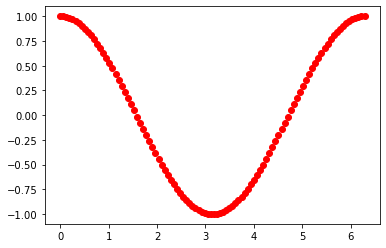

In [47]:
plt.plot(x,y,'ro')

Reshape Arrays

In [48]:
a2 = np.arange(10).reshape((2,5)) 

In [49]:
a2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [50]:
a2.reshape(10) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
a2.reshape((3,4))

ValueError: cannot reshape array of size 10 into shape (3,4)

In [ ]:
a2.reshape((10,1)) #ten rows and one column

### Broadcasting

In [26]:
a2 = a2.reshape((10,1))

In [27]:
a2

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [28]:
b2 = np.array([1,2,3])

In [29]:
b2

array([1, 2, 3])

In [30]:
a2 + b2

array([[ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11],
       [10, 11, 12]])

Broadcasting:  numpy will compare array shapes and consider respective dimensions to be compatible if:
1. they are equal
2. one of them is 1

In [ ]:
a3 = np.array([[3,4,5],[6,7,8]])
b3 = np.array([[1,2,3]])

In [ ]:
a3 * b3

Another (intuitive) example:  adding or multiplying a matrix by a scalar
* Every dimension of a scalar is one

In [ ]:
2 * a3 + 1

### Operations Along Axes

In [31]:
a

array([[1, 2],
       [3, 4]])

In [35]:
a.sum() # sum of all elements in an array

10

In [ ]:
a.sum(axis=0) # sum of every column

In [ ]:
a.sum(axis=1) # sum of every row

In [33]:
a.cumsum() # cumulative sum

array([ 1,  3,  6, 10])

In [34]:
a.cumsum(axis=1) # cumulative sum of each row

array([[1, 3],
       [3, 7]])

In [ ]:
a.min() # min of entire array

In [ ]:
a.min(axis=0)

In [ ]:
a.max() # max of entire array

In [ ]:
a.max(axis=1)

### Example: Estimating $\pi$

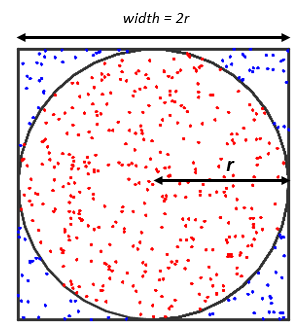

The fraction of sample points that make it into the circle is:

$$\frac{N_{inside}}{N_{total}} = \frac{\pi r^2}{4 r^2}$$

so we can use our sample to calculate $\pi$ via:

$$\pi = 4 \frac{N_{inside}}{N_{total}}$$

In [39]:
np.random.uniform(0,1) # generates a random point between 0 and 1

0.46671565546812277

In [40]:
x = np.random.uniform(0,1,1000) # creates an array of 1000 random points between 0 and 1
y = np.random.uniform(0,1,1000)
in_circle = (((x-0.5)**2 + (y-0.5)**2) < 0.5**2) 

In [38]:
in_circle # returns which points in the array fall in the circle

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [41]:
np.unique(in_circle, return_counts=True) # returns the number of false values and true values

(array([False,  True]), array([199, 801]))

In [42]:
in_unique, in_counts = np.unique(in_circle, return_counts=True)

In [43]:
in_counts

array([199, 801])

In [44]:
4 * in_counts[1] / 1000 # estimate of pi

3.204

In [45]:
# the above steps put into one function
def pi_estimate(nums = 1000):
    x = np.random.uniform(0,1,nums)
    y = np.random.uniform(0,1,nums)
    in_circle = (((x-0.5)**2 + (y-0.5)**2) < 0.5**2)
    in_unique, in_counts = np.unique(in_circle, return_counts=True)
    estimated_pi = 4 * in_counts[1] / nums
    print('pi = '+str(estimated_pi))
    return x,y

In [46]:
pi_estimate(100)

pi = 3.2


(array([0.72996359, 0.50194945, 0.24232199, 0.64431823, 0.59245865,
        0.06951008, 0.73130542, 0.31616278, 0.00205334, 0.91423149,
        0.14836325, 0.53732033, 0.50668485, 0.37809231, 0.08694693,
        0.0760509 , 0.03157349, 0.98048153, 0.51671279, 0.48166525,
        0.25816032, 0.04696615, 0.5537599 , 0.33026225, 0.58291482,
        0.21768854, 0.53979488, 0.04748038, 0.73752307, 0.10489192,
        0.98353029, 0.92573483, 0.03082395, 0.95148458, 0.28410829,
        0.39690434, 0.28501137, 0.54932272, 0.17570694, 0.42541873,
        0.04655967, 0.3354956 , 0.02054312, 0.10142963, 0.95976848,
        0.02344544, 0.97631075, 0.59923246, 0.64947709, 0.48729324,
        0.61595003, 0.87943552, 0.74332329, 0.85596232, 0.35471213,
        0.88893938, 0.63087146, 0.95066436, 0.93232515, 0.60761306,
        0.33088204, 0.73813118, 0.28474944, 0.2584069 , 0.7063678 ,
        0.43285687, 0.82755606, 0.41871591, 0.16528524, 0.81476165,
        0.90323263, 0.85214345, 0.95342774, 0.43

In [47]:
fig,ax = plt.subplots(figsize=(5,5))
x,y = pi_estimate(100)
plt.plot(x,y,'ro')
plt.axis([0, 1, 0, 1])
circle1 = plt.Circle((0.5, 0.5), 0.5)
plt.gca().add_patch(circle1)
plt.show();

NameError: name 'plt' is not defined

## SciPy

* SciPy is the core package for scientific routines in Python
* it operates efficiently on numpy arrays and the two are intended to work together
* Many sub-modules are available:
  * *scipy.cluster* - Vector quantization / Kmeans
  * *scipy.constants* - Physical and mathematical constants
  * *scipy.fftpack* - Fourier transform
  * *scipy.integrate* - Integration routines
  * *scipy.interpolate* - Interpolation
  * *scipy.io* - Data input and output
  * *scipy.linalg* - Linear algebra routines
  * *scipy.ndimage* - n-dimensional image package
  * *scipy.odr* - Orthogonal distance regression
  * *scipy.optimize* - Optimization
  * *scipy.signal* - Signal processing
  * *scipy.sparse* - Sparse matrices
  * *scipy.spatial* - Spatial data structures and algorithms
  * *scipy.special* - Any special mathematical functions
  * *scipy.stats* - Statistics
* I will show brief examples here and discuss some more scipy material next week.

[Acknowledgement goes to examples from the scipy docs]

### Interpolation

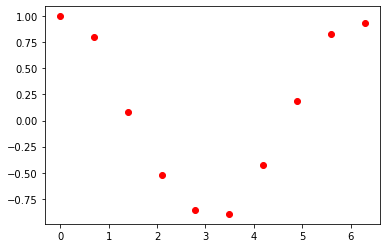

In [50]:
x = np.linspace(0,2*np.pi,10)
noise = (np.random.random(10)*2 - 1) * 0.1
y = np.cos(x) + noise
plt.plot(x,y,'ro')

In [51]:
from scipy.interpolate import interp1d

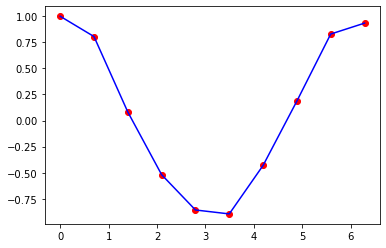

In [52]:
# linear interpolation 
linear_interp = interp1d(x, y)

xlin = np.linspace(0, 2*np.pi, 100)
ylin = linear_interp(xlin)

plt.plot(x,y,'ro')
plt.plot(xlin,ylin,'b-')

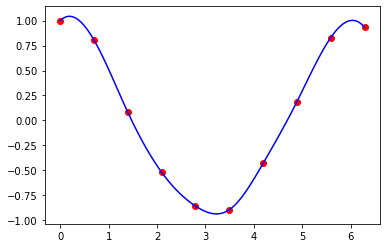

In [53]:
# cubic interpolation
cubic_interp = interp1d(x, y, kind='cubic')

xcub = np.linspace(0, 2*np.pi, 100)
ycub = cubic_interp(xcub)

plt.plot(x,y,'ro')
plt.plot(xcub,ycub,'b-')

### Images

In [54]:
import imageio
from scipy import misc
from scipy import ndimage
import numpy as np

In [55]:
parrot = imageio.imread('parrot.jpeg')

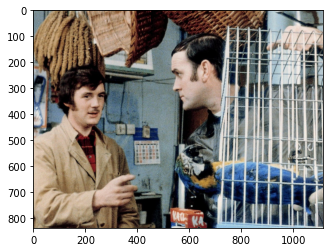

In [56]:
plt.imshow(parrot)

In [57]:
noisy_parrot = np.copy(parrot).astype(np.float)
noisy_parrot += parrot.std() * 0.1 * np.random.standard_normal(parrot.shape)
# noisy_parrot = ndimage.gaussian_filter(parrot, sigma=5)

/var/folders/qk/hv87dc8s27d5rgnhn23fklgh0000gn/T/ipykernel_21587/3761119477.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noisy_parrot = np.copy(parrot).astype(np.float)


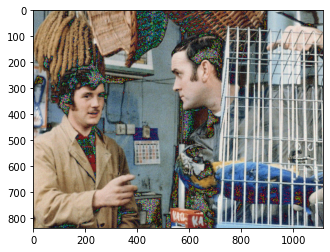

In [58]:
plt.imshow(noisy_parrot.astype('uint8'))

In [59]:
noisy_parrot.shape

(837, 1116, 3)

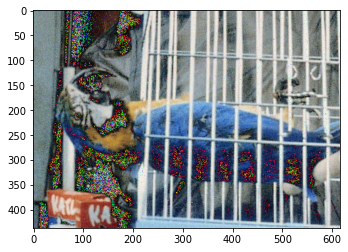

In [60]:
plt.imshow(noisy_parrot[400:,500:,].astype('uint8')) # zoom in

In [65]:
median_parrot = ndimage.median_filter(noisy_parrot, size=5)

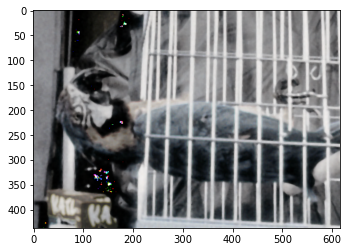

In [62]:
plt.imshow(median_parrot[400:,500:,].astype('uint8'))

In [63]:
rotated_parrot = ndimage.rotate(noisy_parrot, -90)

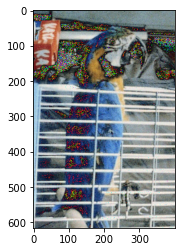

In [64]:
plt.imshow(rotated_parrot[500:,:400,].astype('uint8')) # rotate image

<img src="parrot.jpeg” alt="parrot” width="200">